In [ ]:
!pip install glove-python-binary

In [ ]:
import glove 

In [ ]:
from glove import Glove, Corpus


In [ ]:
lines=["Hello this is a tutorial on how to convert the word in an integer format","this is a beautiful day","Jack is going to office"]

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
s=stopwords.words("english")





words=[]
for line in lines:
  w=[]
  for i in line.split(" "):
    if i not in s:
      w.append(i)
  words.append(w)
print(words)  





In [ ]:
lines=[['Hello', 'this','tutorial', 'on', 'how','convert' ,'word','integer','format'],['this' ,'beautiful', 'day'],['Jack','going' , 'office']]

In [ ]:
corpus = Corpus() 


In [ ]:
corpus.fit(lines, window=10)


In [ ]:
glove = Glove(no_components=5, learning_rate=0.05)
 
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True) #training model
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')

In [ ]:
glove.add_dictionary(corpus.dictionary)

In [ ]:
print(glove.word_vectors[glove.dictionary['tutorial']])


[-0.07467153 -0.0776291   0.08759846 -0.0799028  -0.05973774]


In [ ]:
glove.most_similar('tutorial')

In [ ]:
#Pre-trained model1

In [ ]:
import gensim.downloader as api

glove_model1 = api.load('glove-twitter-25')
sample_glove_embedding=glove_model['computer']

In [ ]:
sample_glove_embedding

array([ 0.64005 , -0.019514,  0.70148 , -0.66123 ,  1.1723  , -0.58859 ,
        0.25917 , -0.81541 ,  1.1708  ,  1.1413  , -0.15405 , -0.11369 ,
       -3.8414  , -0.87233 ,  0.47489 ,  1.1541  ,  0.97678 ,  1.1107  ,
       -0.14572 , -0.52013 , -0.52234 , -0.92349 ,  0.34651 ,  0.061939,
       -0.57375 ], dtype=float32)

In [ ]:
glove_model.most_similar('girl')

[('boy', 0.9596140384674072),
 ('kid', 0.953269898891449),
 ('like', 0.9455347657203674),
 ('guy', 0.9448168277740479),
 ('friend', 0.941986620426178),
 ('look', 0.9395405650138855),
 ('sister', 0.9377639293670654),
 ('boyfriend', 0.9370700120925903),
 ('she', 0.9360418319702148),
 ('girls', 0.9336652755737305)]

In [ ]:
#Pre-trained model2

In [ ]:
import gensim.downloader as api

glove_model = api.load('glove-wiki-gigaword-300')

In [ ]:
glove_model.most_similar("girl")

[('boy', 0.9596140384674072),
 ('kid', 0.953269898891449),
 ('like', 0.9455347657203674),
 ('guy', 0.9448168277740479),
 ('friend', 0.941986620426178),
 ('look', 0.9395405650138855),
 ('sister', 0.9377639293670654),
 ('boyfriend', 0.9370700120925903),
 ('she', 0.9360418319702148),
 ('girls', 0.9336652755737305)]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


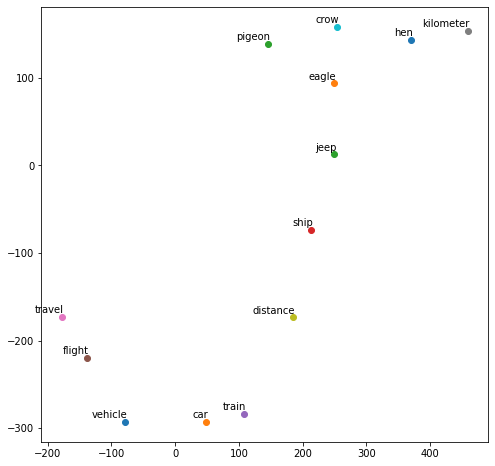

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


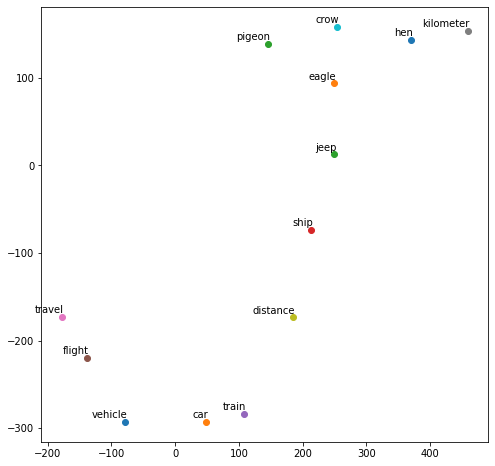

In [ ]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]
vocab2=['vehicle','car','jeep','ship','train','flight','travel','kilometer','distance','crow','hen','eagle','pigeon']
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab2:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(glove_model)
tsne_plot(glove_model1)
